#Overview


*   The objective of this notebook is to commission a multi-class classification algorithm to predict the final grades of student based on the academic and personal characteristics of the students as a part of kaggle competition.

*   Train and test datasets for this notebook is taken from the kaggle competition itself.

*   For predicting the final grades, a supervised baseline machine learning model and 2 neural network models with different learning techniques, architectures and parameters.

*   Data is cleaned and the feature engineering is done based on the absolute value of the correlation of the features with target column.

*   Random Forest classifier is selected as baseline machine learning model.

*   First Neural network is of a 4 layered one and is tuned for optimized parameters.

*   Second Neural network is of a 6 layered one and is initialized with the optimized parameters from the first neural network.

*   Mean F1 Score and Accuracy are the metrics selected to evaluate the model performance.

# Model & Method

## Importing Libraries

In [1]:
#Firstly, importing the necessary libraries.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## Loading Dataset

In [2]:
#Loading the train and the test datasets. 
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


## Exploratory Data Analysis

Checking the shape of the datasets. 

In [3]:
print('The shape of the train dataset is: {0}'.format(train.shape))
print('The shape of the test dataset is: {0}'.format(test.shape))

The shape of the train dataset is: (20064, 34)
The shape of the test dataset is: (101, 33)


### Data types

Inspecting the datatypes in the train and test datasets. 

In [4]:
print("TRAIN DATASET DATATYPES AND COUNTS:")
print("############################")
print(train.info())
print("############################")
print("############################")
print("############################")
print("############################")
print("############################")
print("TEST DATASET DATATYPES AND COUNTS:")
print("############################")
print(test.info())

TRAIN DATASET DATATYPES AND COUNTS:
############################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20064 entries, 0 to 20063
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          20064 non-null  int64 
 1   school      20064 non-null  object
 2   sex         20064 non-null  object
 3   age         20064 non-null  int64 
 4   address     20064 non-null  object
 5   famsize     20064 non-null  object
 6   Pstatus     20064 non-null  object
 7   Medu        20064 non-null  int64 
 8   Fedu        20064 non-null  int64 
 9   Mjob        20064 non-null  object
 10  Fjob        20064 non-null  object
 11  reason      20064 non-null  object
 12  guardian    20064 non-null  object
 13  traveltime  20064 non-null  int64 
 14  studytime   20064 non-null  int64 
 15  failures    20064 non-null  int64 
 16  schoolsup   20064 non-null  object
 17  famsup      20064 non-null  object
 18  paid        20064 non

### Missing values

On checking for missing data in both the train and test dataset and it can be seen that there is no observation missing from the dataset.

In [5]:
train.isna().sum()

id            0
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
Grade         0
dtype: int64

In [6]:
test.isna().sum()

id            0
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
dtype: int64

### Analysing the target variable: GRADE.


In [7]:
train['Grade'].describe()

count    20064.000000
mean         9.024771
std          1.311570
min          5.000000
25%          8.000000
50%          9.000000
75%          9.000000
max         18.000000
Name: Grade, dtype: float64

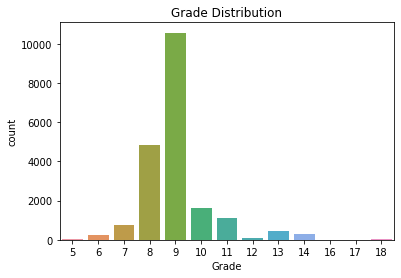

In [8]:
g = sns.countplot(x='Grade',data=train)
g.set_title('Grade Distribution')
plt.show()

By looking at the visualization, it can be said that the values are categorical values ranging from 5 to 18.

### Analysing the Categorical Features

In [9]:
cols = train.select_dtypes(include=['object']).columns
for col in cols:
      print(f"column name : {col}")
      print(train[col].value_counts())
      print('---------------------------')

column name : school
GP    13620
MS     6444
Name: school, dtype: int64
---------------------------
column name : sex
F    11161
M     8903
Name: sex, dtype: int64
---------------------------
column name : address
U    14907
R     5157
Name: address, dtype: int64
---------------------------
column name : famsize
GT3    13642
LE3     6422
Name: famsize, dtype: int64
---------------------------
column name : Pstatus
T    16953
A     3111
Name: Pstatus, dtype: int64
---------------------------
column name : Mjob
other       7007
at_home     4441
services    4032
teacher     2309
health      2275
Name: Mjob, dtype: int64
---------------------------
column name : Fjob
other       8892
services    4100
teacher     2721
at_home     2400
health      1951
Name: Fjob, dtype: int64
---------------------------
column name : reason
course        8202
home          6318
reputation    3173
other         2371
Name: reason, dtype: int64
---------------------------
column name : guardian
mother    12584

## Feature Engineering

1. As Grade column represents the final grade of a student that is cummulative of columns G1 and G2, only considering Grade column as the target column and dropping the G1 and G2 columns.
2. Also dropping id and school column as they are not so significant in predicting the student grade
3. Converting categorical values to relative numerical values using one hot encoding.

In [10]:
# Selecting target column
labels = train['Grade']

# drop the school and grade columns
train.drop(['id','school', 'G1', 'G2'], axis='columns',inplace=True)
test.drop(columns=['id','school', 'G1', 'G2'],axis='columns',inplace=True)
    
# One-Hot Encoding of Categorical Variables
train = pd.get_dummies(train)
test = pd.get_dummies(test)

train_main = pd.get_dummies(train)
test_main = pd.get_dummies(test)

train.head()

age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   16     0     3           2          2         1       5         4      2   
1   17     4     0           1          4         0       4         2      4   
2   17     1     0           1          2         0       4         4      2   
3   17     2     2           3          1         0       2         4      2   
4   14     0     1           1          0         0       3         3      2   

   Dalc  ...  activities_no  activities_yes  nursery_no  nursery_yes  \
0     1  ...              0               1           0            1   
1     2  ...              0               1           0            1   
2     1  ...              0               1           1            0   
3     2  ...              1               0           0            1   
4     2  ...              0               1           0            1   

   higher_no  higher_yes  internet_no  internet_yes  romantic_no  romantic_yes  
0          1           0            0             1            1             0  
1          0           1            0             1            0             1  
2          1           0            0             1            0             1  
3          0           1            0             1            1             0  
4          0           1            0             1            1             0  

[5 rows x 55 columns]

To achieve better accuracy and the model to predict the final grades better, top 10 features that have a strong positive or a strong negative correlation with the target variable are considered.

In [11]:
# selecting the most correlated values and dropping the others
most_correlated = train.corr().abs()['Grade'].sort_values(ascending=False)
most_correlated = most_correlated[:10]
most_correlated

Grade                1.000000
studytime            0.699380
failures             0.348047
higher_yes           0.228508
higher_no            0.228508
Medu                 0.196841
absences             0.143699
reason_reputation    0.018288
famsup_yes           0.014673
famsup_no            0.014673
Name: Grade, dtype: float64

Slicing the train and test dataframes to contain only the highly correlated features

In [12]:
train = train.loc[:, most_correlated.index]
test = test.loc[:,most_correlated.index[1:]]
train.head()

Grade  studytime  failures  higher_yes  higher_no  Medu  absences  \
0      7          2         1           0          1     0         2   
1     12          4         0           1          0     4        28   
2      8          2         0           0          1     1         3   
3      9          1         0           1          0     2         2   
4      8          0         0           1          0     0         0   

   reason_reputation  famsup_yes  famsup_no  
0                  0           1          0  
1                  0           1          0  
2                  0           0          1  
3                  1           1          0  
4                  1           1          0

In [13]:
test.head()

studytime  failures  higher_yes  higher_no  Medu  absences  \
0          1         0           1          0     3         2   
1          1         0           1          0     4         0   
2          1         0           1          0     3         1   
3          2         0           1          0     1         0   
4          1         0           1          0     3         1   

   reason_reputation  famsup_yes  famsup_no  
0                  0           1          0  
1                  0           0          1  
2                  0           0          1  
3                  0           1          0  
4                  0           1          0

Encoding the categorical variables lead to a creation of two separate columns each for higher education and family education support which are reducntant and have a strong correlation with target column. For this reason, dropping the redundant columns of higher education and family education support.

In [14]:
train.drop(columns=['higher_no','famsup_no'],inplace=True)
test.drop(columns=['higher_no','famsup_no'],inplace=True)
train.columns

Index(['Grade', 'studytime', 'failures', 'higher_yes', 'Medu', 'absences',
       'reason_reputation', 'famsup_yes'],
      dtype='object')

## Visualizing the Categorical column's value distribuion

### Failures Vs Grade

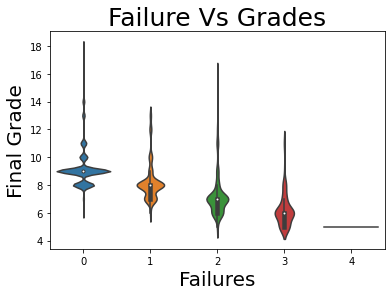

In [15]:
b = sns.violinplot(x='failures',y='Grade',data=train)
b.axes.set_title('Failure Vs Grades', fontsize = 25)
b.set_xlabel('Failures', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

Less Failures result in higher grades.

### Studytime Vs Grade

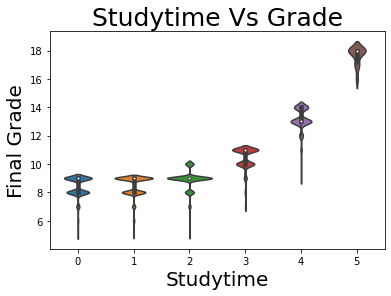

In [16]:
b = sns.violinplot(x='studytime',y='Grade',data=train)
b.axes.set_title('Studytime Vs Grade', fontsize = 25)
b.set_xlabel('Studytime', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

More Studytime result in higher grades

### Wish to go for higher studies Vs Grade

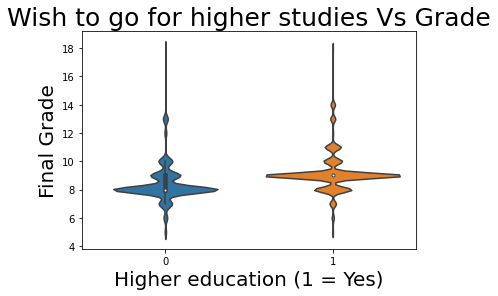

In [17]:
b = sns.violinplot(x = 'higher_yes', y='Grade',data=train)
b.axes.set_title('Wish to go for higher studies Vs Grade', fontsize = 25)
b.set_xlabel('Higher education (1 = Yes)', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

Students who wish to go for higher studies score more.

Since the columns are categorical and each category has good distribution among the categories, there are no outliers. It can also be seen this by looking at the description of the features in the dataset and see that there is no max value that is too far from the mean and can bias our estimation.

In [18]:
train.describe()

Grade     studytime      failures    higher_yes          Medu  \
count  20064.000000  20064.000000  20064.000000  20064.000000  20064.000000   
mean       9.024771      1.541368      0.134619      0.815441      2.532197   
std        1.311570      0.993014      0.460545      0.387949      1.128737   
min        5.000000      0.000000      0.000000      0.000000      0.000000   
25%        8.000000      1.000000      0.000000      1.000000      2.000000   
50%        9.000000      1.000000      0.000000      1.000000      3.000000   
75%        9.000000      2.000000      0.000000      1.000000      3.000000   
max       18.000000      5.000000      4.000000      1.000000      4.000000   

           absences  reason_reputation    famsup_yes  
count  20064.000000       20064.000000  20064.000000  
mean       2.009270           0.158144      0.753389  
std        3.505567           0.364885      0.431049  
min        0.000000           0.000000      0.000000  
25%        0.000000           0.000000      1.000000  
50%        1.000000           0.000000      1.000000  
75%        3.000000           0.000000      1.000000  
max       39.000000           1.000000      1.000000

Checking the first 5 rows of data in the datasets.

In [19]:
train.head(5)

Grade  studytime  failures  higher_yes  Medu  absences  reason_reputation  \
0      7          2         1           0     0         2                  0   
1     12          4         0           1     4        28                  0   
2      8          2         0           0     1         3                  0   
3      9          1         0           1     2         2                  1   
4      8          0         0           1     0         0                  1   

   famsup_yes  
0           1  
1           1  
2           0  
3           1  
4           1

In [20]:
test.head(5)

studytime  failures  higher_yes  Medu  absences  reason_reputation  \
0          1         0           1     3         2                  0   
1          1         0           1     4         0                  0   
2          1         0           1     3         1                  0   
3          2         0           1     1         0                  0   
4          1         0           1     3         1                  0   

   famsup_yes  
0           1  
1           0  
2           0  
3           1  
4           1

## User defined functions

### To generate an output CSV

To generate an output CSV when the predicted values, file name and the test dataframe are given as inputs

In [21]:
def generateOutputCSV(predictions,outputFileName,df):
    df['id'] = df.index
    df['grade'] = predictions
    df[['id','grade']].to_csv(outputFileName,index=False)

### To calculate metrics

To calculate regression metrics MSE and R2 Score

In [22]:
from sklearn.metrics import f1_score, accuracy_score
def calculate_metrics(y_test,y_pred):
  #recision, recall, f_score, support = precision_recall_fscore_support(y_test, y_pred,zero_division=0)
  #return round(np.mean(f_score),3)
  return [round(f1_score(y_test,y_pred,average='weighted'),3),round(accuracy_score(y_test,y_pred),2)]


## Train and Test Split

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train.iloc[:,1:],train.iloc[:,0],test_size=0.2,random_state=42)

## Baseline Machine Learning Model (Random Forest Classifier)

Random Forest Regressor was chosen over other models because it takes into account many predictions, prediction based on trees is more accurate. This is due to the use of an average value. These algorithms are more stable because changes in the dataset only affect one tree and not the entire forest of trees. Random forest algorithm can effectively manage very high dimensional (large number of features size) data without selecting features; it can handle both continuous and discrete data. Random forests are also very adaptive to the dataset; the input dataset does not have to be standardized. Many researches have demonstrated that compounded classifiers perform better in classification, making the random forest approach crucial in both regression and classification.

Usages (Examples of) of the Random Forest Regression for student grade prediction in the literature:

[1] Che, Hangjun, Huang, Shaohai, Wei, Junjie (2022). Student Performance Prediction in Mathematics Course Based on the Random Forest and Simulated Annealing. https://doi.org/10.1155/2022/9340434. Available at: https://www.hindawi.com/journals/sp/2022/9340434/

[2] Deepika, K., & Sathyanarayana, N. (2019). Relief-F and Budget Tree Random Forest based feature selection for student academic performance prediction. International Journal of Intelligent Engineering and Systems, 12(1), 30-39.

[3] Leena H. Alamri, Ranim S. Almuslim, Mona S. Alotibi, Dana K. Alkadi, Irfan Ullah Khan, and Nida Aslam. 2020. Predicting Student Academic Performance using Support Vector Machine and Random Forest. In 2020 3rd International Conference on Education Technology Management (ICETM 2020). Association for Computing Machinery, New York, NY, USA, 100–107. DOI:https://doi.org/10.1145/3446590.3446607

## Deep Learning Model - Neural Network with optimized parameters

> Sequential Model

> 3 Layers

*   Layer 1
    * **Nodes**: 200
    * **Activation**: relu 

*   Layer 2
    * **Nodes**: 100
    * **Activation**: relu

*   Layer 3
    * **Nodes**: 50
    * **Activation**: relu

*   Layer 4 (Output Layers)
    * **Nodes**: 19
    * **Activation**: softmax

> Optimizer: Adam

> Loss function: categorical_crossentropy

> Metrics: Accuracy

## Deep Learning - Neural Network with Batch Normalization

Additional Neural Network with different Architecture and same optimized parameters as Neural Network 1 with **Batch Normalization**

> Sequential Model

> 5 Layers

*   Layer 1
    * **Nodes**: 1000
    * **Activation**: relu 

*   Layer 2
    * **Nodes**: 500
    * **Activation**: relu

*   Layer 3
    * **Nodes**: 250
    * **Activation**: relu

*   Layer 4
    * **Nodes**: 120
    * **Activation**: relu

*   Layer 5
    * **Nodes**: 60
    * **Activation**: relu

*   Layer 6 (Output Layer)
    * **Nodes**: 19
    * **Activation**: softmax


> Optimizer: Adam

> Loss function: CategoricalCrossEntropy

> Metrics: Accuracy

# Training & Validation

## Modelling using Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_eval = rf.predict(X_test)
y_pred = rf.predict(test)

### Classification Metrics
Calulating classification metrics 

In [25]:
metric_rf = calculate_metrics(y_test,y_pred_eval)
print("Mean F1 Score : {0}".format(metric_rf[0]))
print("Accuracy Score : {0}".format(metric_rf[1]))

Mean F1 Score : 0.964
Accuracy Score : 0.97


### Generating Prediction CSV

Creating a csv with prediction outputs.

In [26]:
generateOutputCSV(y_pred,'GradePredictions_Baseline_ML.csv',test)

## Modelling Using Neural Network With Optimized Parameters 


Spliiting train features and labels into training and validation dataframes with test size of 15%

In [27]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# x = pd.DataFrame(sc.fit_transform(train_main.iloc[:,:-1]))
# test_main = pd.DataFrame(sc.fit_transform(test_main))
# y = to_categorical(train_main['Grade'])

In [28]:
from keras.utils.np_utils import to_categorical
X_train,X_test,y_train,y_test = train_test_split(train.iloc[:,1:],to_categorical(labels),test_size=0.15,random_state=42)

Initializing a 4 layer neural network with tuned parameters

In [29]:
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, RMSprop
model = Sequential()
model.add(Dense(200, input_shape = X_train.shape[1:], activation = "relu"))
model.add(Dense(100, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(50, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(19, activation = "softmax"))

### Compiling The Model

In [30]:
model.compile(Adam(learning_rate = 0.0001), loss = "categorical_crossentropy", metrics = ["accuracy"])

### Summary Of The Model

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               1600      
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 19)                969       
                                                                 
Total params: 27,719
Trainable params: 27,719
Non-traina

### Training & Evaluating The Neural Network Model

In [32]:
history = model.fit(X_train, y_train, verbose=0, epochs=50, shuffle=True)

In [33]:
y_pred = np.argmax(model.predict(X_test),axis=1)

In [34]:
y_test_NN1 = np.argmax(y_test, axis=1)
metric_NN1 = calculate_metrics(y_test_NN1,y_pred)
print("Mean F1 Score : {0}".format(metric_NN1[0]))
print("Accuracy Score : {0}".format(metric_NN1[1]))

Mean F1 Score : 0.968
Accuracy Score : 0.97


#### Loss Vs Accuracy

Plotting the loss value trends with repsect to the epochs: as the epochs increase, the loss decreases.

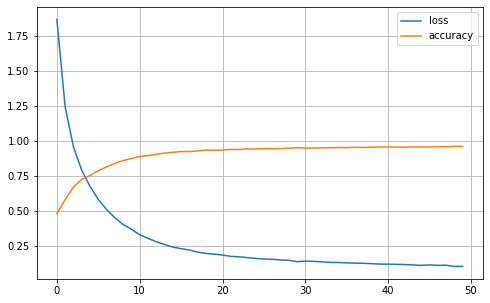

In [35]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)

### Predicting the final grades for the test data

In [36]:
test.drop(columns=['id','grade'],inplace=True)
y_pred = np.argmax(model.predict(test),axis=1)

### Generating predictions CSV

In [37]:
generateOutputCSV(y_pred,'GradePredictions_NN1.csv',test)

## Modelling Using Neural Network with Batch Normalization

Initialising a neural network that learns by Batch Normalization with the tuned parameters and a different architecture from the first neural network. 

Batch Normalization (BatchNorm) is a popular Deep Learning approach owing to its ability to improve the performance of the models while simultaneously reducing training time. The act of applying normalizations to each iteration of the Mini-Batch SGD is known as batch normalization. These normalisations are not only conducted before sending information in the network, but they may also be implemented across many levels of the network.

Batch Normalisation:

1. Reduces gradient reliance on parameter scale or starting values using batch data normalisation. This enables the feature to employ significantly greater learning rates.
2. Adds random noise, functioning as a regulariser and, in some situations, removing the requirement for Dropout. This disturbance is introduced by: 

  **a.** The process of transformation itself.

  **b.** The means and variances of distinct mini-batches, which may vary considerably somewhat. 
  
  If the algorithm can ensure that the dispersion of highly nonlinear inputs stays more stable while the network trains, the optimiser is less likely to become trapped in the saturated regime. As a result, saturating non - linearities without having to worry about parameter initialisation may be applied. 

In [38]:
# Batch Normalisation 

model = Sequential()

model.add(Dense(1000, input_shape = X_train.shape[1:], activation = "relu"))
model.add(keras.layers.BatchNormalization())

model.add(Dense(500, activation = "relu"))
model.add(keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(Dense(250, activation = "relu"))
model.add(keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(Dense(120, activation = "relu"))
model.add(keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(Dense(60, activation = "relu"))
model.add(keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(Dense(19, activation = "softmax"))

### Compiling The Model

In [39]:
model.compile(Adam(learning_rate = 0.0001), loss = "categorical_crossentropy", metrics = ["accuracy"])

### Summary Of The Model

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1000)              8000      
                                                                 
 batch_normalization (BatchN  (None, 1000)             4000      
 ormalization)                                                   
                                                                 
 dense_5 (Dense)             (None, 500)               500500    
                                                                 
 batch_normalization_1 (Batc  (None, 500)              2000      
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 500)               0         
                                                                 
 dense_6 (Dense)             (None, 250)              

### Training & Evaluating The Neural Network Model

In [41]:
history = model.fit(X_train, y_train, verbose=0, epochs=50, shuffle=True)

In [42]:
y_pred = np.argmax(model.predict(X_test),axis=1)

In [43]:
y_test_NN2 = np.argmax(y_test, axis=1)
metric_NN2 = calculate_metrics(y_test_NN2,y_pred)
print("Mean F1 Score : {0}".format(metric_NN2[0]))
print("Accuracy Score : {0}".format(metric_NN2[1]))

Mean F1 Score : 0.969
Accuracy Score : 0.97


#### Loss Vs Accuracy

Plotgting the loss value trends over the epochs: as expected, it decreases as the epochs increase. Moreover, on comparing how the loss changes in this model to the one implemented above, it can be seen that the initial decrease is more dramatic (while it was smoother and slower above), and the curve here almost creates a kink. 

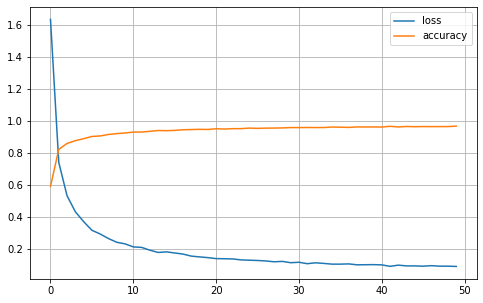

In [44]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)

### Predicting the final grades for the test data

In [45]:
test.drop(columns=['id','grade'],inplace=True)
y_pred = np.argmax(model.predict(test),axis=1)

### Generating predictions CSV

In [46]:
generateOutputCSV(y_pred,'GradePredictions_NN2.csv',test)

# Result and Discussion

### Comparison of the Models

#### Kaggle Scores:

|Model|Public Score|Private Score|
|---|---|---|
|Random Forest Classifier|0.98|0.964|
|4 Layer Dense ANN|1.00|0.968|
|6 Layer Wide & Deep ANN with Batch Normalization|1.00|0.98|


#### Performance on Training Set:

|Model|Mean F1 Score|Accuracy|
|---|---|---|
|Random Forest Classifier|0.964|0.97|
|4 Layer Dense ANN|0.968|0.97|
|6 Layer Wide & Deep ANN with Batch Normalization|0.971|0.97|


It is clearly visible from the tables above, the neural network implemnted with the 6 layers having a batch normalisation is giving us the best results in the training data and test data. When comparing the classification metrics and the kaggle score for all the models implemented, 6 layer neural network has the best scores. Hence this, model with batch normalisation on a 6 layer neural network can be suggested as the model for further usage.

# Summary, Justification & Recommendation

As per the assignment expectation, first a Baseline machine learning model(Random Forest classifier is implemented) which gave a mean F1 Score of 0.964. Next, a 4 - layered neural network is implemneted. By trail and error method, an optimised set of network parameters were obtained. This gave a mean F1 Score of 0.968. To further improve the score, a 6 - layered deep neural network with the same optimized parameters as that of the first neural network was implemented, but with batch normalisation. This gave a mean score of 0.971. To aid the optimization process, Typical architecture of a classification network from Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron [4] was referred.

Dataset has all the quantifiable metrics that are required to predict the final grade of a student. However, it missed on the important quantifiable metric of student IQ and non-quantifiable metric of motivation to get good grades. In a real world scenario, these two metrics could highly influence the final grades of the student. Including these two parameters in the dataset could have made the analysis and prediction more relevant to a real-life scenario.

# Reference

[1] Che, Hangjun, Huang, Shaohai, Wei, Junjie (2022). Student Performance Prediction in Mathematics Course Based on the Random Forest and Simulated Annealing. https://doi.org/10.1155/2022/9340434. Available at: https://www.hindawi.com/journals/sp/2022/9340434/

[2] Deepika, K., & Sathyanarayana, N. (2019). Relief-F and Budget Tree Random Forest based feature selection for student academic performance prediction. International Journal of Intelligent Engineering and Systems, 12(1), 30-39.

[3] Leena H. Alamri, Ranim S. Almuslim, Mona S. Alotibi, Dana K. Alkadi, Irfan Ullah Khan, and Nida Aslam. 2020. Predicting Student Academic Performance using Support Vector Machine and Random Forest. In 2020 3rd International Conference on Education Technology Management (ICETM 2020). Association for Computing Machinery, New York, NY, USA, 100–107. DOI:https://doi.org/10.1145/3446590.3446607

[4] [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron page - 295](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/) .